# Week 5 - Bivariate Analysis

## Please run the cells of the notebook as you get to them while reading

In [35]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import seaborn as sns

# 1. Lesson: Bivariate graphs

In this lesson, we'll consider some bivariate plots: scatter plots, line plots, waterfall plots, area plots, and pair plots.  We'll also look at bivariate statistics such as correlations, ratios, and percentages.  First, let's create some data.

In [36]:
np.random.seed(0)
numpoints = 100
lesson_series_uniform = np.round(np.random.random(size = numpoints) * 100, 2)
lesson_series_base = np.round(np.random.random(size = numpoints)**2 * 100, 2)
lesson_series_skewed = lesson_series_base + np.random.normal(scale = 10, size = numpoints)
lesson_series_reverse = 100 - lesson_series_base + np.random.normal(scale = 10, size = numpoints)

This scatter plot puts one series against another.  The two series are anticorrelated - one goes up when the other goes down.

<Axes: >

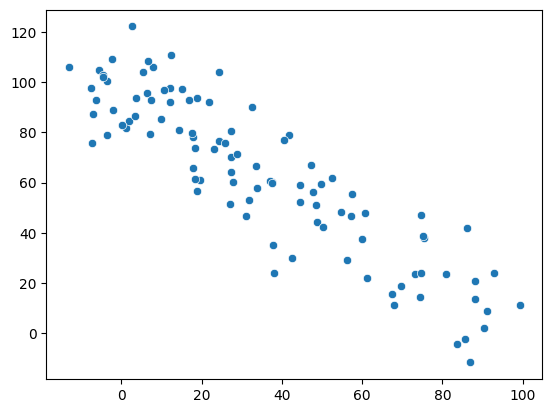

In [37]:
sns.scatterplot(x = lesson_series_skewed, y = lesson_series_reverse)

This pair plot compares three series against one another.  The diagonal shows the histogram of each series, while the non-diagonal entries plot two different series against each other.  The result in column 1, row 2 is a scatter plot that compares series #1 with series #2.  In effect, when the logic of the pair plot tells us to plot a series against itself (column 1, row 1), we draw a histogram.  (It would be silly to draw a scatter plot of a series against itself).  Because series #1 is not based on the "base" series, it is not correlated with series #2 or series #3, so the four scatter plots that compare series #1 to #2 and #3 look patternless.  The two scatter plots that compare series #2 with series #3 do appear to be correlated due to the "base" series that they share in common.

In [38]:
df = pd.DataFrame(np.array([lesson_series_uniform, lesson_series_skewed, lesson_series_reverse]).T, columns = ['uniform', 'skewed', 'reverse'])

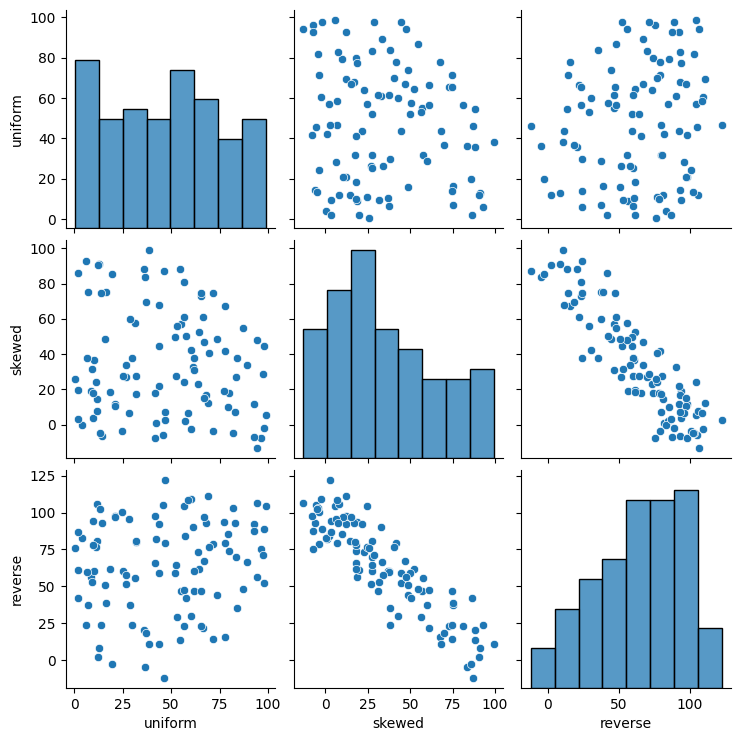

In [39]:
sns.pairplot(df)

We can compute the correlation coefficience between each pair.

In [40]:
print("Correlations:", df.corr())

Correlations:           uniform    skewed   reverse
uniform  1.000000 -0.145022  0.149771
skewed  -0.145022  1.000000 -0.894549
reverse  0.149771 -0.894549  1.000000


This shows that there is a strong negative correlation between the "skewed" and "reverse" datasets (a larger negative number in row 2, column 3 and in row 3, column 2) and almost no correlation between the "uniform" dataset and the others (the much smaller numbers at those locations in the table.)

Q: What is a correlation telling us?

If the correlation is large (close to 1) it tells us that the two variables are usually either both large or both small in value.  If we graphed them on a scatter plot, the shape would be close to a straight line, positioned diagonally from the lower left to upper right.

If the correlation is very negative (close to -1), it tells us that when one variable is large, the other is small.  If we graphed them on a scatter plot, the shape would be close to a straight line, positioned diagonally from the upper left to lower right.

If the correlation is zero, it tells us that the two variables, plotted on a scatter plot, would form a cloud.  The cloud can have different shape - for instance, it could be square or circular - but it cannot look like a diagonal line.  Knowing the value of one variable would tell you nothing about the value of the other variable.  (At least, it would not tell you whether the other variable is large or small).

The correlation coefficients above are called by the letter R.  R can be positive or negative, and lies between -1 and 1.  If we square R, we get a value called $R^2$ which is sometimes used to describe the correlation.  Unless R = 0 or 1, $R^2$ will be smaller in magnitude than R (and always positive), which means that it is very important to know if you are talking about R or $R^2$.  Since the values above can be negative, you can know for sure that they are R values, not $R^2$.

Q: How do you decide if a correlation is strong?

It depends on the application.  Some sources say that a correlation of R = 0.7 or 0.8 is strong, but in other applications (say, the social sciences) a correlation of 0.5 might be considered quite strong.  It is not unusual for social scientists to report correlations even as low a 0.2 as being important.

Q: What is the purpose of finding a correlation?

Here are a few:

1. Variables that are correlated with a target variable might be especially useful in predicting that variable.  This might also suggest that a linear model could work.  On the other hand, just because there are no pairwise correlations doesn't mean that a linear model won't work.  For example, if you select X, Y, and Z from this list of four possibilities: \[\[X = 1, Y = 0, Z = 0], \[X = 0, Y = 1, Z = 0], \[X = 0, Y = 0, Z = 1], \[X = 1, Y = 1, Z = 1]] then any two variables are completely uncorrelated, but the sum of the three is usually 1.  So the linear model Z = 1 - X - Y is accurate in three out of four cases even though all pairwise correlations are zero.

2. Variables that are very correlated with each other might be redundant.  In the extreme case, two variables that have a correlation of 1.0 are "linearly dependent" - they essentially provide the same information.  For example, if one column is a height in inches, and another is a height in centimeters, then they are redundant.  Moreover, if you use two highly correlated variables as predictors, the results will be somewhat unpredictable.  For example, if HI is the height in inches and HC is the height in centimeters, then the following formulas are all equivalent: HC, 2.54 * HI, 0.5 * HC + 1.27 * HI, 1001 * HC - 2540 * HI.  So there's no knowing which one you'll get if you try to build a model based on these variables.  The last one in particular is a little bit surprising, given the large coefficients, but it could very well be the result of a linear regression analysis.

3. Correlation can help you to detect problems with the data.  If two variables are correlated but shouldn't be, or if they're not correlated but should be, there might be something wrong with the data.  It's important to test the data to see if it makes sense.

4. Correlations can be interesting things to report.  If your client or organization is asking for a verbal explanation of the dataset, they might be interested in knowing about any correlations for reasons of their own.

A waterfall chart shows a value after a sequence of inputs and outputs.

In [41]:
import plotly.graph_objects as go

fig = go.Figure(go.Waterfall(
    name='This title is not displayed',
    orientation='v',
    measure=['absolute','relative','relative','relative','relative'],
    x=["2023-Jan", "receipts-in", "interest-in", "expenses-out", "interest-out", "2024-Jan"],
    textposition='outside',
    text=['Total','after-receipts','after-interest','after-expenses','after-interest'],
    y=[123.45,42.08,21.97,-54.31,-50.23],
    connector=dict(line=dict(color='rgb(63, 63, 63)'))
))

fig.update_layout(
    title='Waterfall Plot',
    showlegend=False
)
fig.update_yaxes(range=[-1,230])
fig.show()

A line plot is typically associated with a time or date range.  It shows how a variable rises and falls over a period of time.

C:\Users\abcbb\AppData\Local\Temp\ipykernel_49128\2082488306.py:3: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



<Axes: xlabel='None'>

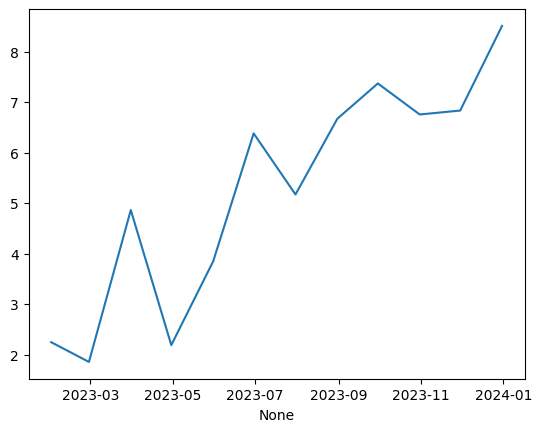

In [42]:
numdates = 12
time_series = np.random.random(size = numdates) * 5 + np.arange(numdates) / 3
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')
sns.lineplot(x = datearray, y = time_series)

An area plot stacks one curve on top of another.  In the graph below, the top line shows the sum of the two series (ser1 + ser2) while the bottom line just shows ser1.

<Axes: >

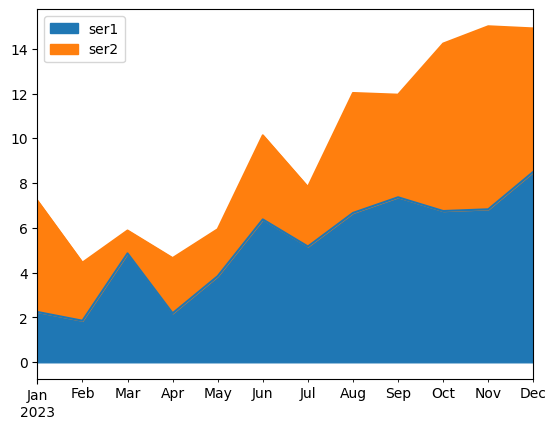

In [43]:
time_series_2 = np.random.random(size = numdates) * 5 + np.arange(numdates) / 3
df = pd.DataFrame({'ser1': time_series, 'ser2': time_series_2}, index = datearray)
df.plot.area()

# 2. Weekly graph question

Below is a pair plot showing the correlation between the levels of chemical A, B, and C in a water sample.  If you had to choose just _three_ of the nine graphs in the pair plot to display, which would you choose?  How would you alter the way these graphs are displayed to make them clearer or more informative?  Would you fit any of these graphs to a line or curve?  Why or why not?  What if you had to choose just _one_?  What if you had to choose _six_?

In [44]:
import numpy as np
import pandas as pd
import seaborn as sns

np.random.seed(0)
num_data = 100
base_data = np.random.random(size = num_data)
chem1 = base_data + np.random.normal(size = num_data) * 0.1
chem2 = base_data**2 + np.random.normal(size = num_data) * 0.1
chem3 = 1 - base_data + np.random.normal(size = num_data) * 0.1
df_chem = pd.DataFrame({'chem1':chem1,'chem2':chem2,'chem3':chem3})

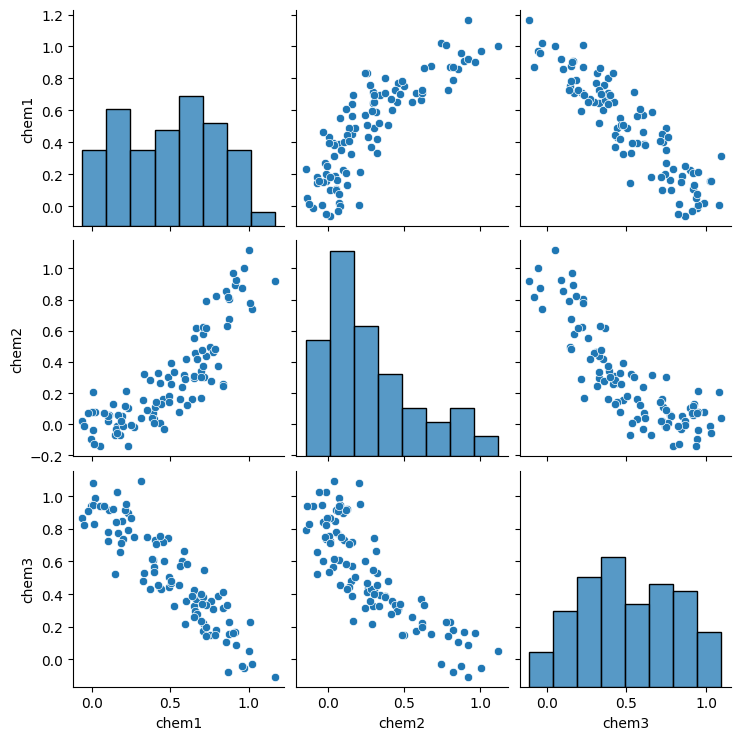

In [45]:
sns.pairplot(df_chem)

### Analysis of the Chemical Pair Plot

This analysis addresses which graphs to select from the provided pair plot, how to improve them, and whether fitting lines or curves would be appropriate.

#### If choosing just *one* graph:

The single most informative graph would be the **scatter plot of `chem1` vs. `chem3`**.

* **Reasoning:** This plot clearly and immediately reveals a strong, negative **linear relationship**. It's the most straightforward relationship in the dataset and strongly hints at an underlying data generation rule (i.e., one variable is a linear transformation of the other, plus noise). An alternative would be the `(chem1, chem2)` plot to highlight the dataset's non-linear nature, but the linear relationship is more direct and easier to interpret at a glance.

#### If choosing *three* graphs:

The best choice would be the three unique scatter plots that show the pairwise relationships:
1.  **`chem1` vs. `chem2`** (shows a positive non-linear relationship)
2.  **`chem1` vs. `chem3`** (shows a negative linear relationship)
3.  **`chem2` vs. `chem3`** (shows a negative non-linear relationship)

* **Reasoning:** This is the most efficient selection. A `pairplot` is symmetrical, meaning the plot of `(chem1, chem2)` contains the same relational information as `(chem2, chem1)`, just with the axes swapped. Choosing these three plots presents all the relational information without redundancy.

#### If choosing *six* graphs:

While not strictly necessary to understand the relationships, choosing six graphs allows for a more comprehensive view. The optimal choice would be:
* **The three unique scatter plots** (as described above).
* **The three histograms on the diagonal** (for `chem1`, `chem2`, and `chem3`).

* **Reasoning:** This combination is the most standard and informative. It not only shows how the variables relate to each other (scatter plots) but also how each variable is distributed individually (histograms).

---

#### How to Improve the Graphs for Clarity

Regardless of the number chosen, the following alterations would make the graphs clearer:

* **Titles and Labels:** Add a clear, descriptive main title (e.g., "Pairwise Relationships of Chemical Concentrations"). Each subplot should also have its own title (e.g., "Chemical A vs. C"). Axis labels should be more descriptive than just the variable name, including units if available (e.g., "Concentration of Chemical A (mg/L)").
* **Annotations:** Text annotations could be added directly onto the plots to point out the type of correlation observed (e.g., "Strong Negative Linear Correlation" on the `chem1`/`chem3` plot).
* **Visual Styling:** For dense point clouds, reducing the opacity (`alpha`) of the points can help visualize the density better. Using a consistent and clear color scheme would also improve readability.

---

#### Fitting a Line or Curve

Yes, fitting a trend line or curve would be highly informative for the scatter plots.

* **For `chem1` vs. `chem3`:** A **straight line (linear regression fit)** is most appropriate. The relationship is strongly linear, and a line would visually confirm this and provide a model for the trend.
* **For `chem1` vs. `chem2` and `chem2` vs. `chem3`:** A **curve (e.g., a polynomial or LOESS fit)** would be more suitable than a straight line. The relationships are clearly curved, and a straight line would misrepresent the underlying pattern. A curve would help the viewer's eye follow the non-linear trend.

# 3. Homework - Reproducing Pair Plot Graphs

I'm going to show you some Pair Plot (Scatter and Histogram) graphs.  I'd like you to generate some data that will generate those graphs.

Example: this cloud involves a match between two normal distributions.

<Axes: xlabel='data1', ylabel='data2'>

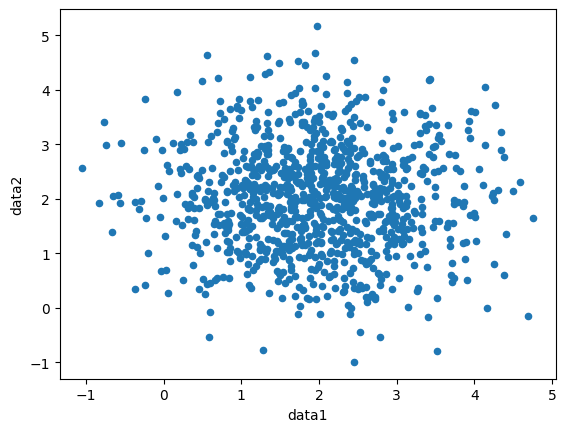

In [46]:
num_points = 1000
np.random.seed(0)
data1 = np.random.normal(size = num_points) + 2
data2 = np.random.normal(size = num_points) + 2
df_twonorm = pd.DataFrame({"data1":data1,"data2":data2})
df_twonorm.plot.scatter(x = "data1", y = "data2")

Problem: Can you design data that will generate the following scatter plot?  You may need to join multiple series to make one big series for the y-axis data.  That will allow you to create the two clouds. Use Google or ChatGPT to find the function that does that.  It is okay if the precise numbers are not re-created; just the general shape: two vertically separated clouds of points.

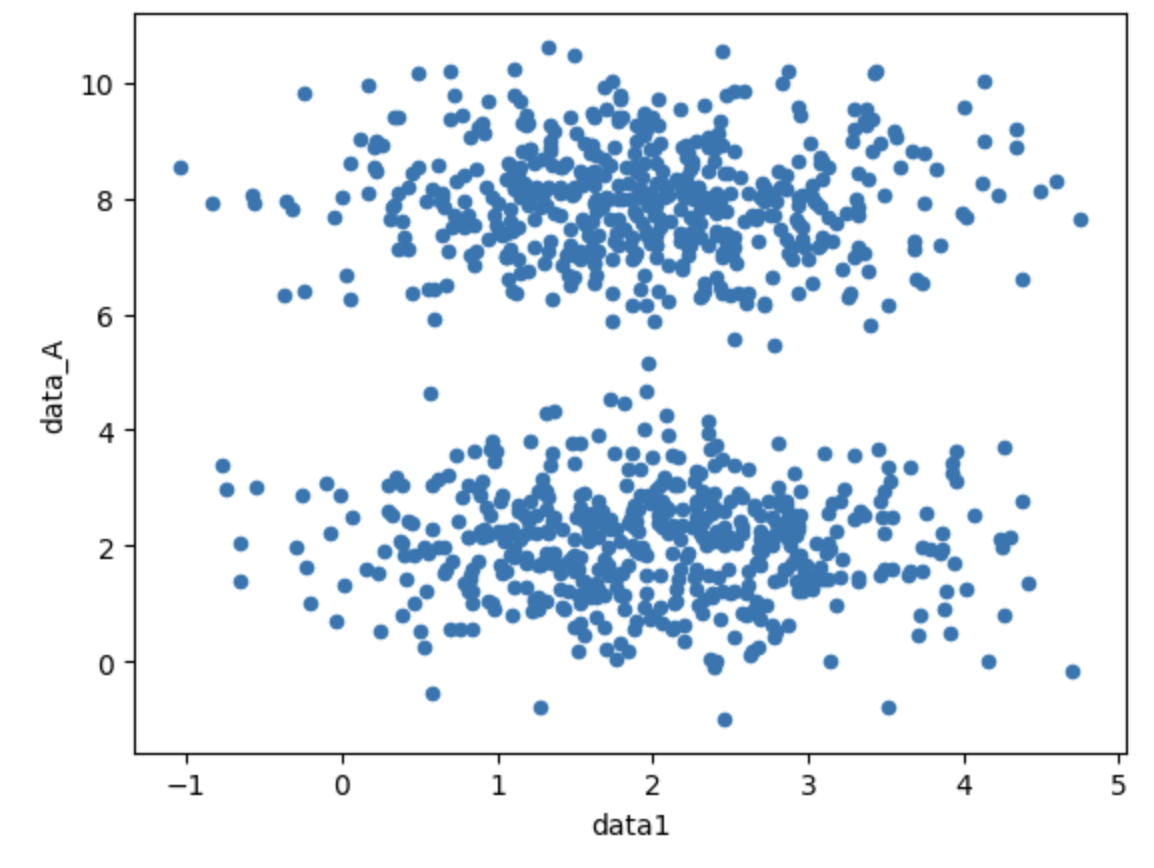

In [47]:
from IPython.display import Image
Image("twoclouds.png")

Challenge problem!  Hint: you will need two series, and three segments of the first series will connect with the three segments of the second series.

<Axes: title={'center': 'Two Vertically Separated Clouds'}, xlabel='data_A', ylabel='data_B'>

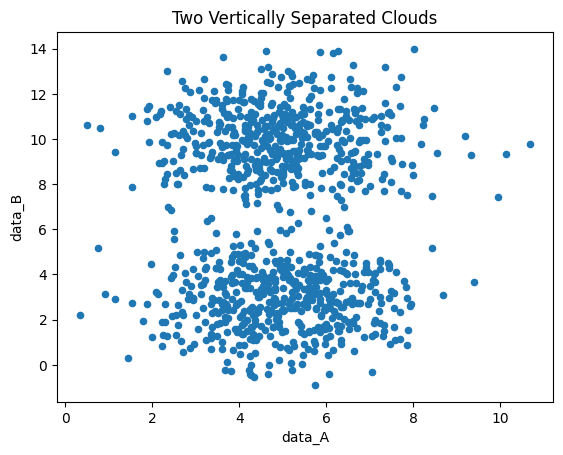

In [48]:
# Set the number of data points per cloud
num_points_per_cloud = 500

# Generate data for the first cloud (bottom)
x1 = np.random.normal(loc=5, scale=1.5, size=num_points_per_cloud)
y1 = np.random.normal(loc=3, scale=1.5, size=num_points_per_cloud)

# Generate data for the second cloud (top)
x2 = np.random.normal(loc=5, scale=1.5, size=num_points_per_cloud)
y2 = np.random.normal(loc=10, scale=1.5, size=num_points_per_cloud)

# Combine the two data groups
combined_x = np.concatenate([x1, x2])
combined_y = np.concatenate([y1, y2])

# Create a DataFrame and visualize
df_two_clouds = pd.DataFrame({'data_A': combined_x, 'data_B': combined_y})
df_two_clouds.plot.scatter(x='data_A', y='data_B', title='Two Vertically Separated Clouds')

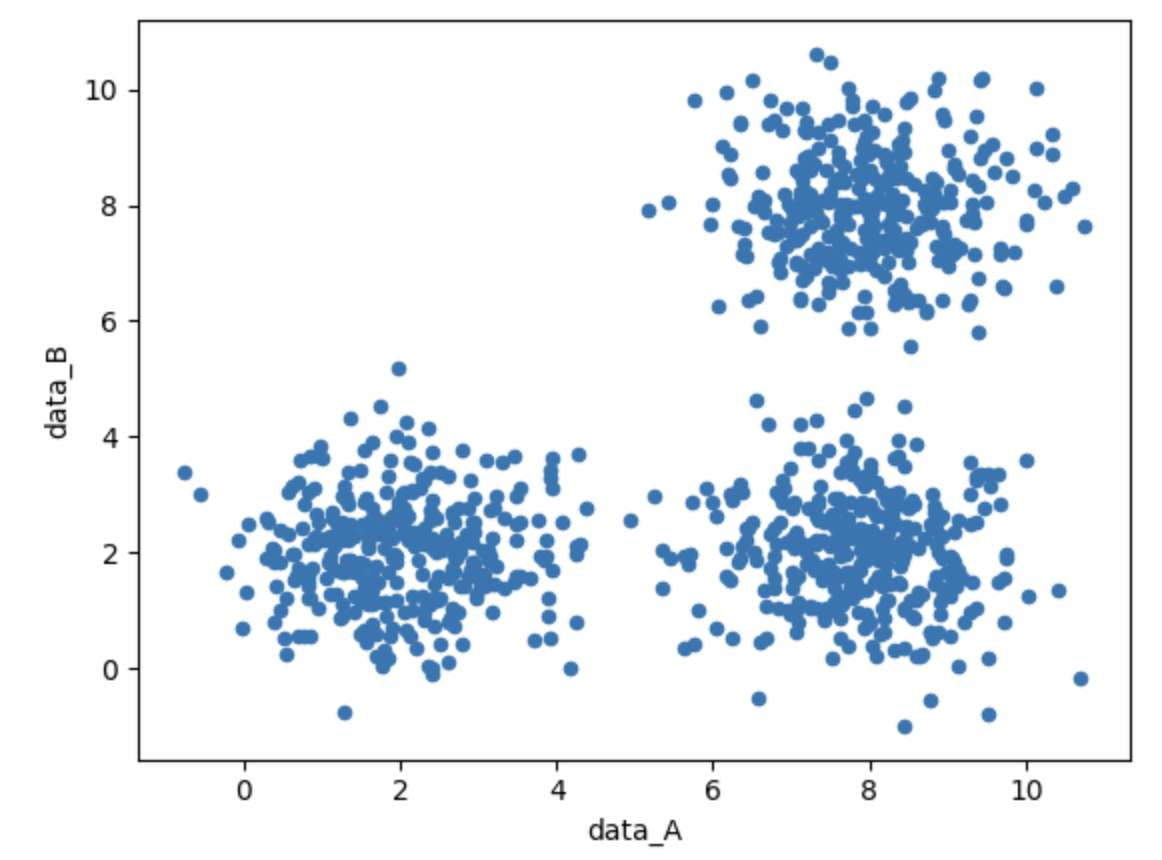

In [49]:
from IPython.display import Image
Image("threeclouds.png")

Would you expect to see a correlation for this challenge problem?  (Hint: does knowing the value of data_A tell you anything about the value of data_B - in particular, whether it is large or small?)  If you managed to reproduce the graph using data, test it yourself using the corr() function.

<Axes: title={'center': 'Three Diagonally Arranged Clouds'}, xlabel='data_A', ylabel='data_B'>

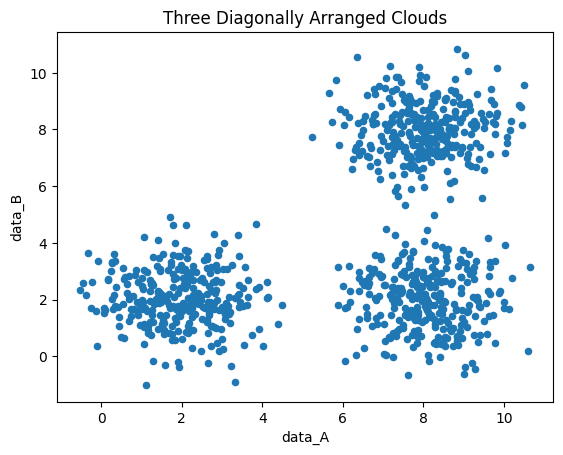

In [50]:
# Set the number of data points per cloud
num_points_per_cloud = 300

# First cloud (bottom-left)
x1 = np.random.normal(loc=2, scale=1.0, size=num_points_per_cloud)
y1 = np.random.normal(loc=2, scale=1.0, size=num_points_per_cloud)

# Second cloud (center)
x2 = np.random.normal(loc=8, scale=1.0, size=num_points_per_cloud)
y2 = np.random.normal(loc=2, scale=1.0, size=num_points_per_cloud)

# Third cloud (top-right)
x3 = np.random.normal(loc=8, scale=1.0, size=num_points_per_cloud)
y3 = np.random.normal(loc=8, scale=1.0, size=num_points_per_cloud)

# Combine the data groups
combined_x = np.concatenate([x1, x2, x3])
combined_y = np.concatenate([y1, y2, y3])

# Create a DataFrame and visualize
df_three_clouds = pd.DataFrame({'data_A': combined_x, 'data_B': combined_y})
df_three_clouds.plot.scatter(x='data_A', y='data_B', title='Three Diagonally Arranged Clouds')

Here is a histogram.  Can you provide data that will approximately re-create this histogram?

It is okay if the precise numbers are not re-created; just the general shape: tailing off on either side, but tailing off to a nonzero number.  (In this case, about 300).

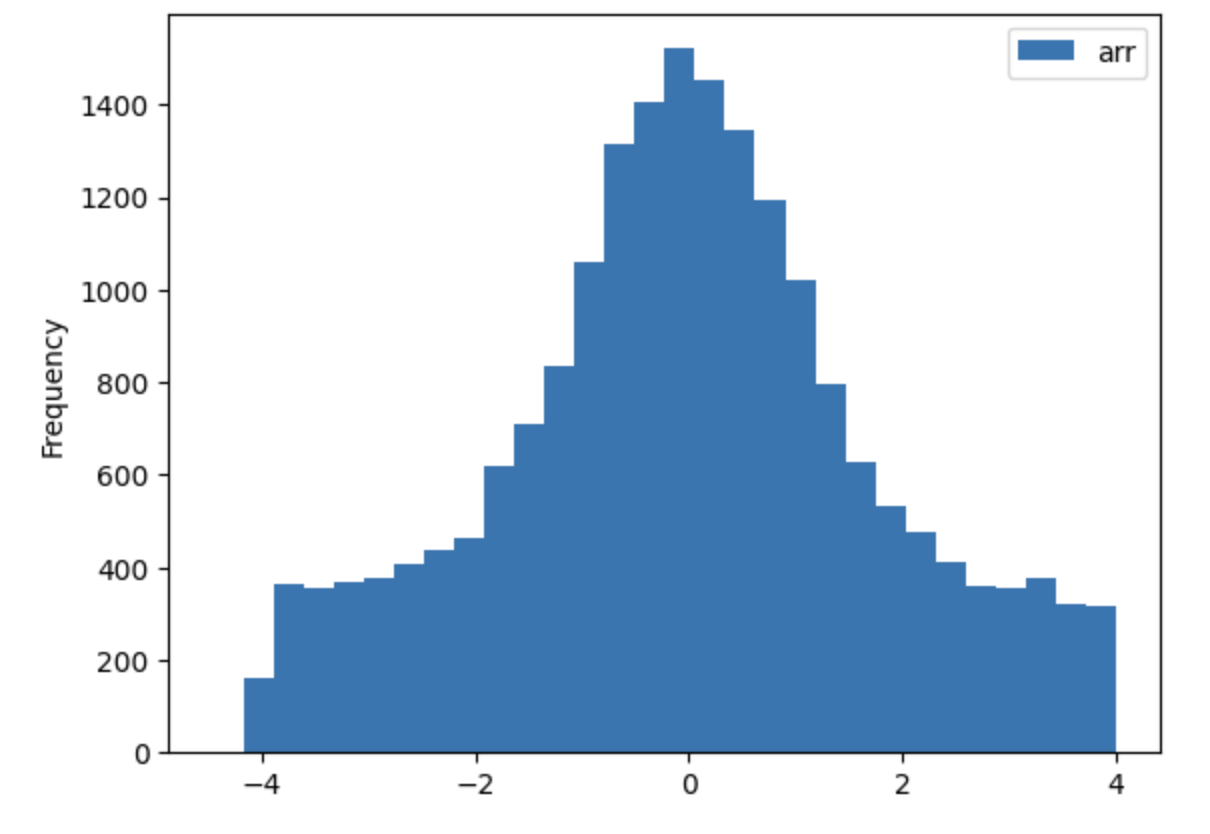

In [51]:
from IPython.display import Image
Image("histogram.png")

<Axes: title={'center': 'Histogram with Fat Tails'}, ylabel='Frequency'>

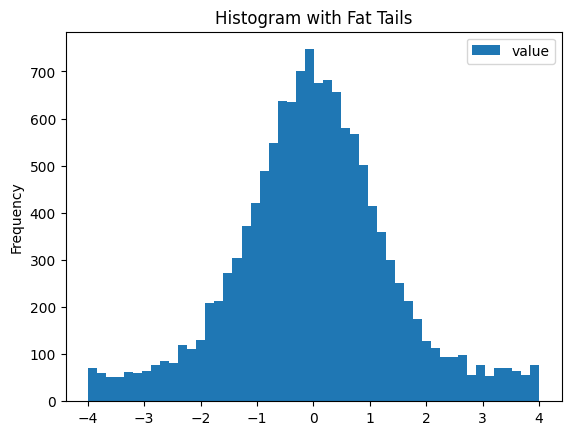

In [52]:
# Set the number of data points
num_normal = 10000  # Data for the central peak
num_uniform = 3000   # Data for the tails (1500 for each side)

# Generate data for the central peak (normal distribution)
data_normal = np.random.normal(loc=0, scale=1, size=num_normal)

# Generate data for the tails (uniform distribution)
data_uniform = np.random.uniform(low=-4, high=4, size=num_uniform)

# Combine the data
combined_data = np.concatenate([data_normal, data_uniform])

# Create a DataFrame and plot the histogram
df_hist = pd.DataFrame({'value': combined_data})
df_hist.plot.hist(bins=50, title='Histogram with Fat Tails') # 'bins' is the number of bars

Create a line plot that shows a sales volume of soft drinks that decreases, then increases over the course of a year, in a U-shaped curve, but with some noise.

<Axes: title={'center': 'U-Shaped Soft Drink Sales Over a Year'}, xlabel='Month'>

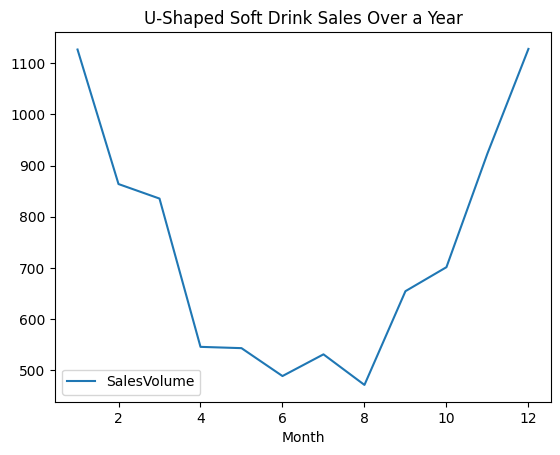

In [53]:
# Generate data for 12 months
months = np.arange(12)  # 0 to 11 (representing Jan to Dec)

# Create the basic U-shaped pattern (lowest point is at x=5.5, between June and July)
base_sales = ((months - 5.5)**2) * 20 + 500  # **2 is squared, other numbers are for shaping

# Add noise
noise = np.random.normal(loc=0, scale=50, size=12) # 'scale' controls the noise intensity

# Final sales volume data
soft_drink_sales = base_sales + noise

# Create a DataFrame and plot the line graph
df_sales = pd.DataFrame({'Month': months + 1, 'SalesVolume': soft_drink_sales})
df_sales.plot.line(x='Month', y='SalesVolume', title='U-Shaped Soft Drink Sales Over a Year')

Create an area plot that shows the sales volume for two brands of soft drinks, one of which is increasing then decreasing, the other decreasing then increasing.

<Axes: title={'center': 'Area Plot of Competing Soft Drink Brands'}>

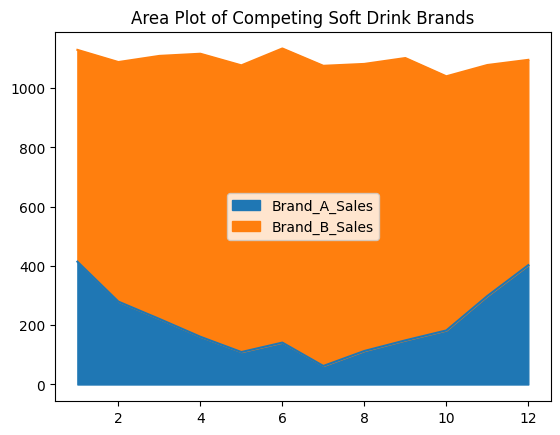

In [54]:
# Generate data for 12 months
months = np.arange(12)

# Brand A Sales (U-shaped)
sales_A_base = ((months - 5.5)**2) * 10 + 100
sales_A = sales_A_base + np.random.normal(loc=0, scale=20, size=12)

# Brand B Sales (inverted U-shaped)
sales_B_base = 1000 - ((months - 5.5)**2) * 10
sales_B = sales_B_base + np.random.normal(loc=0, scale=20, size=12)


# Create a DataFrame
df_area = pd.DataFrame({
    'Brand_A_Sales': sales_A,
    'Brand_B_Sales': sales_B
}, index=months + 1) # Set the index to months

# Plot the area graph
df_area.plot.area(title='Area Plot of Competing Soft Drink Brands')

# 4. Storytelling With Data plot



Reproduce any graph of your choice in p. 71-85 of the Storytelling With Data book as best you can.  (The first half of chapter three).

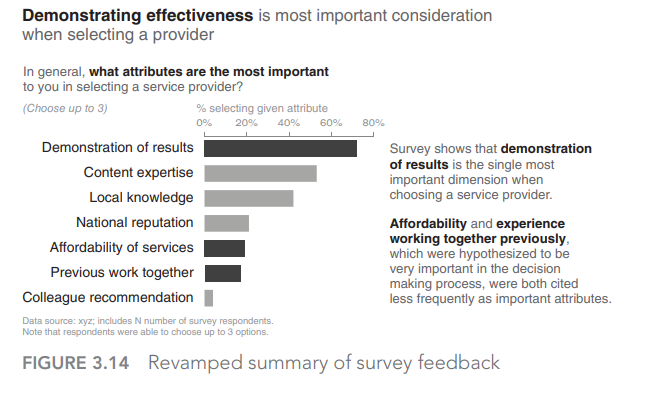

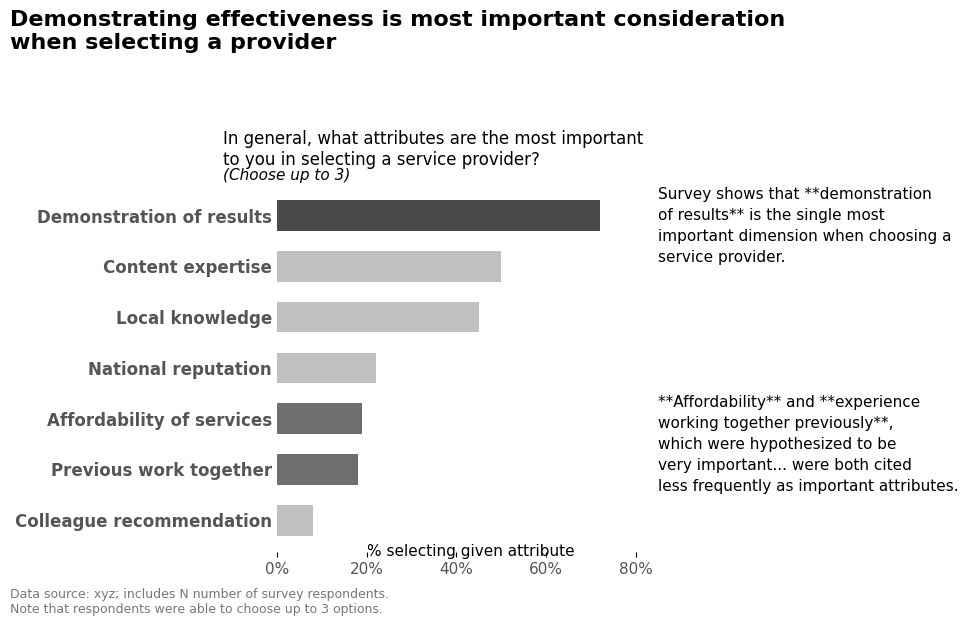

In [55]:
import matplotlib.pyplot as plt

# 1. Prepare Data
categories = [
    'Colleague recommendation',
    'Previous work together',
    'Affordability of services',
    'National reputation',
    'Local knowledge',
    'Content expertise',
    'Demonstration of results'
]
values = [8, 18, 19, 22, 45, 50, 72]

# Create a Pandas DataFrame
df = pd.DataFrame({
    'Category': categories,
    'Value': values
})

# Sort data by value to match the graph's layout
df = df.sort_values(by='Value', ascending=True).reset_index(drop=True)

# 2. Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# --- Customizations ---

# Create a color list for emphasis
# Highlight 'Demonstration of results', make others light grey
colors = ['#4A4A4A' if cat == 'Demonstration of results' else '#C0C0C0' for cat in df['Category']]
# Highlight 'Affordability' and 'Previous work'
colors[1] = '#6E6E6E'
colors[2] = '#6E6E6E'


# Create horizontal bar chart
ax.barh(df.index, df['Value'], color=colors, height=0.6)

# Remove all spines (borders)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Set y-axis labels to be the categories
ax.set_yticks(df.index)
ax.set_yticklabels(df['Category'], fontsize=12, fontweight='bold', color='#555555')

# Remove y-axis ticks
ax.tick_params(axis='y', length=0)

# Set x-axis ticks and labels with '%'
ax.set_xticks([0, 20, 40, 60, 80])
ax.set_xticklabels(['0%', '20%', '40%', '60%', '80%'], fontsize=11, color='#555555')

# --- Titles and Annotations ---

# Main Title (using fig.suptitle for better positioning)
fig.suptitle("Demonstrating effectiveness is most important consideration\nwhen selecting a provider",
             x=0.01, y=1.02, ha='left', fontsize=16, fontweight='bold')

# Subtitles using ax.text for precise control
ax.text(-12, 7.0, "In general, what attributes are the most important\nto you in selecting a service provider?",
        ha='left', fontsize=12)
ax.text(-12, 6.7, "(Choose up to 3)", ha='left', fontsize=11, style='italic')
ax.text(20, -0.7, "% selecting given attribute", ha='left', fontsize=11)


# Notes on the right side
note1 = "Survey shows that **demonstration\nof results** is the single most\nimportant dimension when choosing a\nservice provider."
ax.text(85, 5.8, note1, ha='left', va='center', fontsize=11, linespacing=1.5)

note2 = "**Affordability** and **experience\nworking together previously**,\nwhich were hypothesized to be\nvery important... were both cited\nless frequently as important attributes."
ax.text(85, 1.5, note2, ha='left', va='center', fontsize=11, linespacing=1.5)


# Data source note at the bottom (using fig.text)
fig.text(0.01, 0.01, "Data source: xyz; includes N number of survey respondents.\nNote that respondents were able to choose up to 3 options.",
         ha='left', va='bottom', fontsize=9, color='#777777')


# Adjust layout to prevent labels from being cut off
plt.tight_layout(rect=[0, 0.05, 1, 0.95]) # Adjust rect to make space for title/footer

plt.show()